# **Final Project: Yelp Business Ratings Prediction**



**About the data:**
This data was obtained from Kaggle, courtesy of Yelp. It includes information on 174,000 businesses globally and spans from business attributes to checkins and reviews.

**Data Description:**
We used 4 of the 7 datasets provided on Kaggle:

    Business: Business ID, name, city, state, latitude, longitude, categories, stars, review_count
    
    Business Attributes: Good for meals, Dogs allowed, Parking options, Accepts credit cards, Bike Parking, Good For Kids, Takes Reservations, Happy Hour, Caters, Alcohol, Open 24 Hours
    
    Tips: text, date, likes, Business ID, User ID
    
    Checkins: Business ID, weekday, hour, checkins per day


**Project Outline:**

I. Data Cleansing

II. Three Key Findings
    
III. Managerial Findings & Recommendations


In [1]:
#import modules:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

#workaround for weird characters in data
reload(sys)
sys.setdefaultencoding('utf8')

Populating the interactive namespace from numpy and matplotlib


In [2]:
#read in dataset 1:
bus = pd.read_csv("yelp_business.csv")

In [3]:
bus.head(2)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...


In [4]:
#dataset 2:
bus_att = pd.read_csv("yelp_business_attributes.csv")

## Part I: Data Cleaning
1. drop unwanted columns

2. convert columns to dummies

3. merge datasets to create master dataframe

### Cleaning of Dataset1:

1. Remove some unnecessary columns from Dataset1:

In [5]:
bus.drop(['neighborhood','address'],axis=1,inplace=True)

### Cleaning of Dataset 2:
From the output above, we can see that there are many columns, more than we need for our business analysis.  We can do the following to clean up the data:
1.remove some of these columns 
2.make one dummy out of the columns which are similar

In [6]:
#Dropping columns having mostly NA Values

bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='HairSpecializesIn')))]
bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='Music')))]
bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='Ambience')))]
bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='BYOB')))]


bus_att.drop(["AcceptsInsurance", "CoatCheck",  "Smoking","DriveThru", "GoodForDancing",  \
              "Corkage", "ByAppointmentOnly","RestaurantsPriceRange2",\
              "HasTV","NoiseLevel","RestaurantsAttire","WiFi","RestaurantsTakeOut","OutdoorSeating",\
             "RestaurantsDelivery","BusinessAcceptsBitcoin","AgesAllowed","RestaurantsCounterService","RestaurantsGoodForGroups"], axis=1,inplace=True)

In [7]:
bus_att.columns = [c.replace('-', '_') for c in bus_att.columns]

In [8]:
###Creating Parking Dummy
bus_att.loc[(bus_att.BusinessParking_garage=='True')|(bus_att.BusinessParking_street=='True')|\
        (bus_att.BusinessParking_validated=='True')|(bus_att.BusinessParking_lot=='True')|\
        (bus_att.BusinessParking_valet=='True'),'Parking'] = 1
bus_att.loc[(bus_att.Parking!=1)&((bus_att.BusinessParking_garage=='False')|(bus_att.BusinessParking_street=='False')\
                          |(bus_att.BusinessParking_validated=='False')|(bus_att.BusinessParking_lot=='False')|\
                          (bus_att.BusinessParking_valet=='False')),'Parking'] = 0
bus_att.loc[((bus_att.BusinessParking_garage == 'Na')&(bus_att.BusinessParking_street == 'Na')&\
         (bus_att.BusinessParking_validated == 'Na')&(bus_att.BusinessParking_lot == 'Na')&\
         (bus_att.BusinessParking_valet == 'Na')),'Parking'] = 'Na'

In [9]:
##deleting the columns for which combined dummy columns has been created above
bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='BusinessParking')))]
bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='BestNights')))]
bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='GoodForMeal')))]
bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='DietaryRestrictions')))]

In [10]:
#Transform TRUE FALSE variables to 0 and 1s and create dummies:

bus_att.loc[bus_att.BusinessAcceptsCreditCards == 'True', 'BusinessAcceptsCreditCards'] = 1
bus_att.loc[bus_att.BusinessAcceptsCreditCards == 'False', 'BusinessAcceptsCreditCards'] = 0
bus_att.loc[bus_att.BusinessAcceptsCreditCards == 'Na', 'BusinessAcceptsCreditCards'] = 'NaN'

bus_att.loc[bus_att.GoodForKids == '1', 'GoodForKids'] = 0
bus_att.loc[bus_att.GoodForKids == '2', 'GoodForKids'] = 0
bus_att.loc[bus_att.GoodForKids == '3', 'GoodForKids'] = 1
bus_att.loc[bus_att.GoodForKids == '4', 'GoodForKids'] = 1
bus_att.loc[bus_att.GoodForKids == 'Na', 'GoodForKids'] = 'Na'

bus_att.loc[bus_att.WheelchairAccessible == 'True', 'WheelchairAccessible'] = 1
bus_att.loc[bus_att.WheelchairAccessible == 'False', 'WheelchairAccessible'] = 0
bus_att.loc[bus_att.WheelchairAccessible == 'Na', 'WheelchairAccessible'] = 'NaN'

bus_att.loc[bus_att.BikeParking == 'True', 'BikeParking'] = 1
bus_att.loc[bus_att.BikeParking == 'False', 'BikeParking'] = 0
bus_att.loc[bus_att.BikeParking == 'Na', 'BikeParking'] = 'NaN'

bus_att.loc[bus_att.Alcohol == 'True', 'Alcohol'] = 1
bus_att.loc[bus_att.Alcohol == 'False', 'Alcohol'] = 0
bus_att.loc[bus_att.Alcohol == 'Na', 'Alcohol'] = 'NaN'


bus_att.loc[bus_att.Caters == 'True', 'Caters'] = 1
bus_att.loc[bus_att.Caters == 'False', 'Caters'] = 0
bus_att.loc[bus_att.Caters == 'Na', 'Caters'] = 'NaN'

bus_att.loc[bus_att.RestaurantsReservations == 'True', 'RestaurantsReservations'] = 1
bus_att.loc[bus_att.RestaurantsReservations == 'False', 'RestaurantsReservations'] = 0
bus_att.loc[bus_att.RestaurantsReservations == 'Na', 'RestaurantsReservations'] = 'NaN'

bus_att.loc[bus_att.HappyHour == 'True', 'HappyHour'] = 1
bus_att.loc[bus_att.HappyHour == 'False', 'HappyHour'] = 0
bus_att.loc[bus_att.HappyHour == 'Na', 'HappyHour'] = 'NaN'

bus_att.loc[bus_att.RestaurantsTableService == 'True', 'RestaurantsTableService'] = 1
bus_att.loc[bus_att.RestaurantsTableService == 'False', 'RestaurantsTableService'] = 0
bus_att.loc[bus_att.RestaurantsTableService == 'Na', 'RestaurantsTableService'] = 'NaN'

bus_att.loc[bus_att.DogsAllowed == 'True', 'DogsAllowed'] = 1
bus_att.loc[bus_att.DogsAllowed == 'False', 'DogsAllowed'] = 0
bus_att.loc[bus_att.DogsAllowed == 'Na', 'DogsAllowed'] = 'NaN'


bus_att.loc[bus_att.Open24Hours == 'True', 'Open24Hours'] = 1
bus_att.loc[bus_att.Open24Hours == 'False', 'Open24Hours'] = 0
bus_att.loc[bus_att.Open24Hours == 'Na', 'Open24Hours'] = 'NaN'

Now we can merge datasets 1 and 2 together on the common column "business_id".

In [11]:
##merging dataset
mdf= bus.merge(bus_att, left_on = "business_id", right_on = "business_id")

In [12]:
mdf.info()

### More cleaning after creation of master DF

Later we want to use machine learning techniques to look at which types of businesses get high rating (0-3.5 stars) vs. low rating (4-5 stars), so we must create a rating dummy for this:

In [13]:
##Creating Dummy for Stars

mdf.loc[mdf.stars > 3.5, 'stars_dum'] = 1
mdf.loc[mdf.stars <= 3.5, 'stars_dum'] = 0

In [14]:
##Getting general categories: ???
# Creating Restaurant_only dummy column

mdf['Restaurants'] = mdf['categories'].str.contains("Restaurants")

mdf.loc[mdf.Restaurants == True, 'Restaurants_dum'] = 1
mdf.loc[mdf.Restaurants == False, 'Restaurants_dum'] = 0

In [15]:
# Creating Health dummy column 
mdf['Health'] = mdf['categories'].str.contains("Health & Medical")

mdf.loc[mdf.Health == True, 'Health_dum'] = 1
mdf.loc[mdf.Health == False, 'Health_dum'] = 0

In [16]:
# Creating Shopping dummy column
mdf['Shopping'] = mdf['categories'].str.contains("Shopping")

mdf.loc[mdf.Shopping == True, 'Shopping_dum'] = 1
mdf.loc[mdf.Shopping == False, 'Shopping_dum'] = 0

In [17]:
# Creating Beauty dummy column
mdf['Beauty'] = mdf['categories'].str.contains("Beauty & Spas")

mdf.loc[mdf.Beauty == True, 'Beauty_dum'] = 1
mdf.loc[mdf.Beauty == False, 'Beauty_dum'] = 0

In [18]:
# Creating Nightlife dummy column
mdf['Nightlife'] = mdf['categories'].str.contains("Nightlife")

mdf.loc[mdf.Nightlife == True, 'Nightlife_dum'] = 1
mdf.loc[mdf.Nightlife == False, 'Nightlife_dum'] = 0

In [19]:
##drop boolean columns:

mdf.drop(['Restaurants', 'Health', 'Shopping', 'Nightlife', 'Beauty', 'categories'], axis=1).head(2)

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,...,RestaurantsTableService,DogsAllowed,Open24Hours,Parking,stars_dum,Restaurants_dum,Health_dum,Shopping_dum,Beauty_dum,Nightlife_dum
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,...,NaN,NaN,NaN,1,1.0,0.0,1.0,0.0,0.0,0.0
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,...,NaN,NaN,NaN,Na,0.0,0.0,0.0,0.0,1.0,0.0


### Fill in the NA's using median of each column

In [20]:
# Fill in BusinessAcceptsCreditCards column's na values with it's median value
mdf['BusinessAcceptsCreditCards'].median()
mdf['BusinessAcceptsCreditCards'] = mdf['BusinessAcceptsCreditCards'].replace('NaN', 0)
mdf['BusinessAcceptsCreditCards'].unique()

0.0

array([0, 1], dtype=int64)

In [21]:
# Fill in Open24Hours column's na values with it's median value
mdf['Open24Hours'].median()
mdf['Open24Hours'] = mdf['Open24Hours'].replace('NaN', 0)
mdf['Open24Hours'].unique()

0.0

array([0, 1], dtype=int64)

In [22]:
# Fill in BikeParking column's na values with it's median value
mdf['BikeParking'].median()
mdf['BikeParking'] = mdf['BikeParking'].replace('NaN', 1)
mdf['BikeParking'].unique()

1.0

array([1, 0], dtype=int64)

In [23]:
# Fill in Alcohol column's na values with it's median value
mdf['Alcohol'].median()
mdf['Alcohol'] = mdf['Alcohol'].replace('NaN', 1)
mdf['Alcohol'].unique()

1.0

array([1, 0], dtype=int64)

In [24]:
# Fill in DogsAllowed column's na values with it's median value
mdf['DogsAllowed'].median()
mdf['DogsAllowed'] = mdf['DogsAllowed'].replace('NaN', 0)
mdf['DogsAllowed'].unique()

0.0

array([0, 1], dtype=int64)

In [25]:
mdf['Parking'].unique()
mdf.loc[mdf.Parking == 'Na', 'Parking'] = 'NaN'

array([1.0, 'Na', 0.0], dtype=object)

In [26]:
# Fill in Parking column's na values with it's median value, then turning it into integer to get rid of the dot 
mdf['Parking'].median()
mdf['Parking'] = mdf['Parking'].replace('NaN', 1)
mdf['Parking'] = (mdf['Parking']).astype(int)
mdf['Parking'].unique()

1.0

array([1, 0], dtype=int64)

############# Data Cleaning Ends Here #############

# Part II: Analysis & 3 Key Findings

## Finding 1: 

Restaurants have the lowest average rating out of all the business categories, suggesting that people may have higher expectations for restaurants compared to other types of businesses.  In addition, the number of reviews for a business is the most important factor for rating.


First, let's see which business categories are the most common?

In [27]:
#get the counts of each business category:
mdf['categories'] = mdf.categories.str.partition(';')

x=mdf.categories.value_counts()
x10 = x.head(10)   #because we just want to plot the 10 most popular categories


#convert back to dataframe:
x10 = x10.to_frame(name = 'count')

#reset the index to convert categories to a column:
x10.reset_index(level=0, inplace=True)

x10.columns = ['Category', 'Count']
x10

,Category,Count
0,Restaurants,17332
1,Food,6882
2,Shopping,6701
3,Beauty & Spas,5134
4,Home Services,3883
5,Health & Medical,3540
6,Nightlife,2608
7,Local Services,2497
8,Automotive,2367
9,Bars,2147


We see that unsurprisingly, the number of restaurants far surpasses every other type of business on Yelp.

Average number of reviews and and average ratings for each of these top 10 categories:

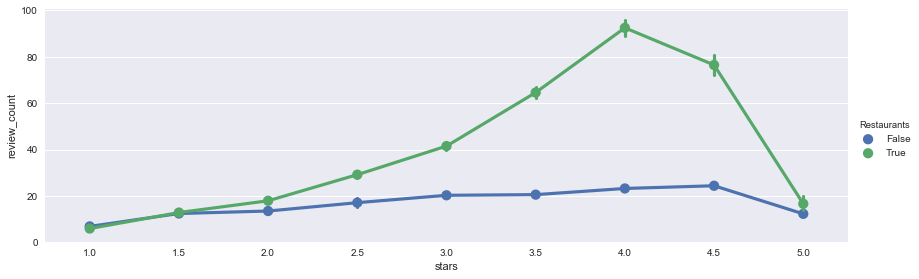

In [28]:
sns.factorplot(x='stars',y='review_count',hue='Restaurants',data=mdf,
              aspect =3)

In [29]:
mdf[mdf['Restaurants_dum'] == 1]["review_count"].sum()

3214770

In [30]:
mdf[mdf['Shopping_dum'] == 1]["review_count"].sum()

377478

In [31]:
mdf[mdf['Health_dum'] == 1]["review_count"].sum()

172519

In [32]:
mdf[mdf['Nightlife_dum'] == 1]["review_count"].sum()

875322

In [33]:
mdf[mdf['Beauty_dum'] == 1]["review_count"].sum()

315099

In [34]:
col1 = ["Restaurants", "Shopping", "Health", "Nightlife", "Beauty"]

col2 = [3214770, 377478, 39487, 875322, 315099]

mx = np.column_stack((col1, col2))

In [35]:
rev_count = pd.DataFrame(mx)

rev_count.columns = ["Category", "Total Reviews"]

rev_count["Total Reviews"] = pd.to_numeric(rev_count["Total Reviews"])

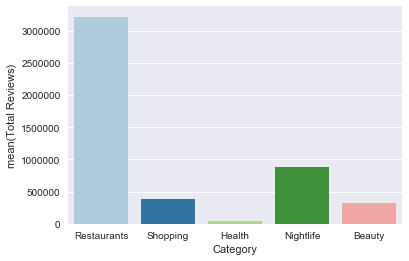

In [36]:
sns.barplot(y = "Total Reviews", x = "Category", data = rev_count, palette = "Paired")

We can see the the number of reviews for restaurants is also much bigger than number of reviews for all the other categories of interest. This is not surprising since most people do use Yelp to find and rate restaurants.

In [37]:
##Average ratings (number of stars) for each category of interest:

mdf[mdf['Beauty_dum'] == 1]["stars"].mean()

mdf[mdf['Health_dum'] == 1]["stars"].mean()

mdf[mdf['Shopping_dum'] == 1]["stars"].mean()

mdf[mdf['Restaurants_dum'] == 1]["stars"].mean()

mdf[mdf['Nightlife_dum'] == 1]["stars"].mean()

3.9546757762459586

3.8617270869598124

3.672145755128351

3.4613381297659864

3.541726315789474

In [38]:
##Create small df for average ratings by category:

col3 = ["Restaurants", "Shopping", "Health", "Nightlife", "Beauty"]

col4 = [3.46, 3.67, 3.77, 3.54, 3.95]

mx2 = np.column_stack((col3, col4))

avg_rating = pd.DataFrame(mx2)

avg_rating.columns = ["Category", "Avg Rating"]

avg_rating["Avg Rating"] = pd.to_numeric(avg_rating["Avg Rating"])

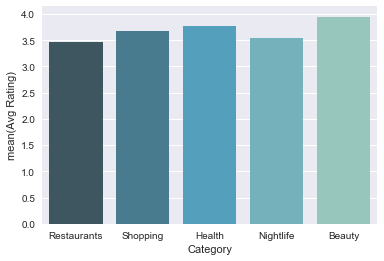

In [39]:
sns.barplot(y = "Avg Rating", x = "Category", data = avg_rating, palette = "GnBu_d")

The above finding is quite interesting, especially when we compare it to the plot of total review counts by category. We find that Restaurants has the lowest average rating, even though it has the most number of reviews by far. This suggests that maybe people have higher expectations for restaurants compared to other types of businesses.

Are there any overall trends between the different variables? We can use corr() function and a heatmap to visualize trends:

In [40]:
corr = mdf.corr()

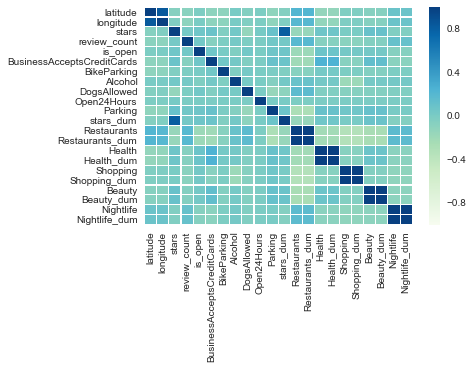

In [41]:
sns.heatmap(corr, annot = False, cmap = "GnBu", linewidths = 0.1)

Here we see several positive correlations (blue):

    Restaurants and review count
    Stars and Accepts Credit Cards
    Restaurants and Dogs Allowed
    Health-related business and Accepts Credit Cards

And also some negative correlations (yellow-green):

    Shopping and Restaurants
    Restaurants and Parking -- this one is surprising! Perhaps many restaurants are in metropolitan areas where there's limited parking.
    
These correlations may provide insight to a business on the types of attributes that competitors (such as other restaurants) are offering.
    

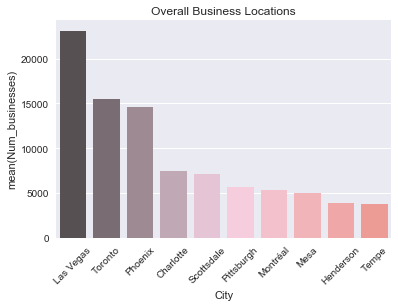

In [42]:
#get the top 10 cities with most number of businesses:
cities = mdf.groupby("city")["business_id"].count().sort_values(ascending = False).head(10)

city = cities.index
num_businesses = cities.get_values()

#convert matrix to df:
mx1 = np.column_stack((city, num_businesses))
cities10 = pd.DataFrame(mx1)
cities10.columns = ["City", "Num_businesses"]


p = sns.barplot(y = "Num_businesses", x = "City", data = cities10, palette = "Set3_d")

p.set_xticklabels(p.get_xticklabels(), rotation=45)
p.set_title('Overall Business Locations')

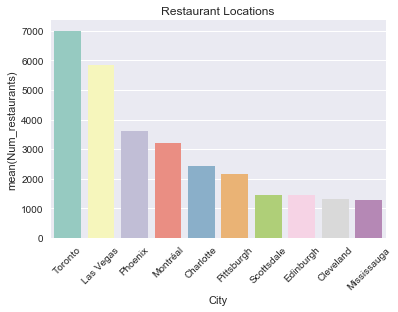

In [43]:
#create df with restaurants only:
mdfr = mdf[mdf['Restaurants_dum'] == 1]

#get the top 10 cities with most number of restaurants:
cities = mdfr.groupby("city")["business_id"].count().sort_values(ascending = False).head(10)

city = cities.index
num_rest = cities.get_values()

#convert matrix to df:
mx2 = np.column_stack((city, num_rest))
cities10 = pd.DataFrame(mx2)
cities10.columns = ["City", "Num_restaurants"]


p = sns.barplot(y = "Num_restaurants", x = "City", data = cities10, palette = "Set3")

p.set_xticklabels(p.get_xticklabels(), rotation=45)
p.set_title('Restaurant Locations')

Las Vegas, Toronto, and Phoenix have the greatest number of both total businesses and restaurants. These are also all major metropolitan cities so that makes sense.  Interestingly, Toronto has more restaurants than Vegas, but Vegas has more total businesses.  This suggests that Vegas has a more diverse range of businesses.

### **Machine Learning for Finding 1: Decision Trees**

We will create a decision tree to validate or refute our findings from general analysis above, and also identify which factors contribute most to whether a business has a high or low rating.

In [44]:
#create dataframe specifically for the decision tree (because we don't need to 
#include a lot of the columns as X variables, we can only use columns with numeric values):

mldf = mdf[["review_count", "is_open", "Restaurants", "Health", "Shopping", "Nightlife", "Beauty", "Parking", "Open24Hours", "BusinessAcceptsCreditCards", "BikeParking", "Alcohol", "stars_dum"]]

In [45]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [46]:
#Make X & Y for decision tree

X=mldf.drop('stars_dum',axis=1)
Y =mldf['stars_dum']

In [47]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

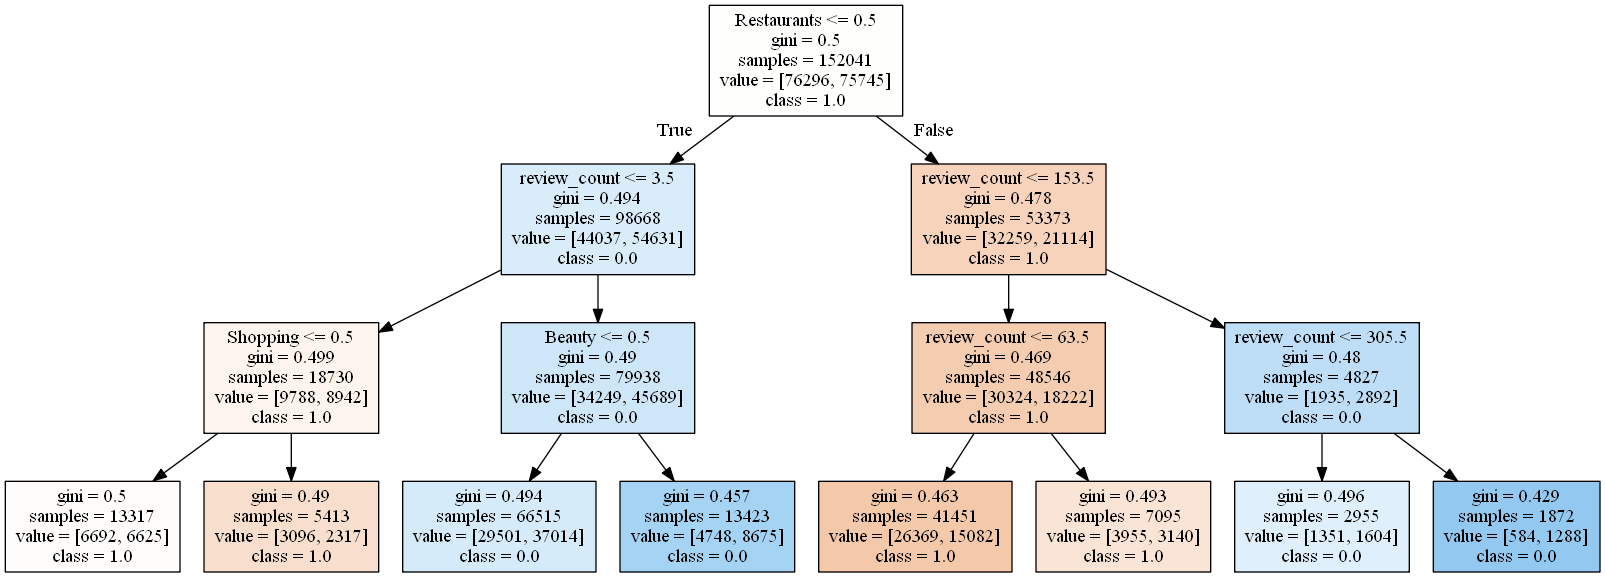

In [48]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(["review_count", "is_open", "Restaurants", "Health", "Shopping", "Nightlife", "Beauty", "Parking", "Open24Hours", "BusinessAcceptsCreditCards", "BikeParking", "Alcohol"])
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names, filled = True)
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png()) 


**What does the decision tree tell us?**

1. Whether the business is a restaurant or not is the most defining factor for ratings, since it splits the tree at the first level. This validates what we saw visually in the seaborn graph above showing the breakdown of different business categories. This also guided our next steps in analysis, in which we decided to focus specifically on restaurant businesses.

2. A more interesting finding is that if the business is not a restaurant, the data is split by review count <= 3.5. This is a really low number of reviews, suggesting that people tend to review restaurants much more than they review other types of businesses on Yelp.

## Finding 2: Analyze restaurant tips and predict ratings

Since in the first finding we have seen that restaurants are most reviewed business, we want focus our remaining analysis on restaurants specifically.

We found that in addition to number of reviews, the tips that customers leave for restaurants on Yelp are very important for their ratings. This is shown by creating and using the new sentiment dummy (positive/negative) below.  **This sentiment represents the overall sentiment (positive or negative) of all the tips for each restaurant.**


**1. To analyse further, we merged two more datasets : yelp_checkin and yelp tip**

Yelp _checkin data_ set has number of checkins in each day of the week. Yelp _tip data_ has mainly tip comments of different users for business ids.

For yelp_checkin, each row represents a business, whereas the columns report:

    business_id: unique business_id
    weekday: day of the week
    hour: time of the day
    checkins: number of checkin each day

For yelp_checkin, each row represents a business, whereas the columns report:

    text: tip comment
    date
    likes: number of likes
    business_id: unique business_id
    user_id: unique business_id

In [49]:
checkin = pd.read_csv("yelp_checkin.csv")

In [50]:
#1. Create a new df with total checkin count for each business id 
checkin1=checkin.groupby(['business_id'],as_index=False)['checkins'].sum()
checkin1.head(10)

,business_id,checkins
0,--6MefnULPED_I942VcFNA,139
1,--7zmmkVg-IMGaXbuVd0SQ,153
2,--8LPVSo5i0Oo61X01sV9A,1
3,--9QQLMTbFzLJ_oT-ON3Xw,33
4,--9e1ONYQuAa-CB_Rrw7Tw,2568
5,--DaPTJW3-tB1vP-PfdTEg,89
6,--DdmeR16TRb3LsjG0ejrQ,30
7,--EX4rRznJrltyn-34Jz1w,12
8,--FBCX-N37CMYDfs790Bnw,490
9,--FLdgM0GNpXVMn74ppCGw,14


In [51]:
tip = pd.read_csv("yelp_tip.csv")

In [52]:
tip.head(5)

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ


### Creating Sentiment Dummies for Yelp Restaurant Tips:

Getting positive and negative tip comment from tip text

In [53]:
positive_words, negative_words = {}, {}             

In [54]:
def load_positive_words(file_name):                                   
    with open(file_name) as f:
        for word in f:
            word = word.strip()
            positive_words[word.upper()] = ""

def load_negative_words(file_name):
    with open(file_name) as f:
        for word in f:
            word = word.strip()
            negative_words[word.upper()] = ""

In [55]:
#load_words('stopwords',stop_words)

load_positive_words('positive-words.txt')
load_negative_words('negative-words.txt')

In [56]:
def apply_func(col_value, words):
    word_count = 0
    try:
        for item in col_value.split():          
            if item.upper() in words:
                word_count+=1
    except:
        word_count =0
        
    return word_count

In [57]:
#make a dummy column for positive or negative overall tip sentiment

tip['pos_tip_comment'] = tip.text.apply(apply_func, args=(positive_words,))
tip['neg_tip_comment'] = tip.text.apply(apply_func, args=(negative_words,))

In [58]:
tip.head(5)

,text,date,likes,business_id,user_id,pos_tip_comment,neg_tip_comment
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg,3,0
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw,2,0
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ,1,0
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ,1,0
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ,1,0


**Create new dataframe with total postive and negative tip keywords for each business_id:**

In [59]:
tip1= tip.groupby(['business_id'],as_index=False).agg({'likes':'sum','pos_tip_comment':'sum','neg_tip_comment':'sum'})
tip1.head(5)

,business_id,neg_tip_comment,likes,pos_tip_comment
0,--6MefnULPED_I942VcFNA,1,0,3
1,--7zmmkVg-IMGaXbuVd0SQ,1,0,8
2,--9QQLMTbFzLJ_oT-ON3Xw,2,0,4
3,--9e1ONYQuAa-CB_Rrw7Tw,24,3,121
4,--DaPTJW3-tB1vP-PfdTEg,0,0,3


### Merging aggregated tip and checkin dataset to master df

In [60]:
mdf1= mdf.merge(checkin1, left_on = "business_id", right_on = "business_id")

In [61]:
mdf2= mdf1.merge(tip1, left_on = "business_id", right_on = "business_id")

In [62]:
mdf2.head()

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,...,Shopping,Shopping_dum,Beauty,Beauty_dum,Nightlife,Nightlife_dum,checkins,neg_tip_comment,likes,pos_tip_comment
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,...,False,0.0,False,0.0,False,0.0,39,0,0,6
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,...,False,0.0,True,1.0,False,0.0,15,0,0,1
2,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,...,True,1.0,False,0.0,False,0.0,120,0,0,3
3,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,...,False,0.0,False,0.0,True,1.0,263,0,0,25
4,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,...,False,0.0,False,0.0,False,0.0,1,0,0,0


In [63]:
#We then looked specifically at restaurants, since the vast majority of businesses in this dataset are restaurants
dfR= mdf2[mdf2['Restaurants_dum'] == 1]
len(dfR)

44437

In [64]:
tip.head(5)

,text,date,likes,business_id,user_id,pos_tip_comment,neg_tip_comment
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg,3,0
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw,2,0
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ,1,0
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ,1,0
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ,1,0


In [65]:
## Visulaization of review count for each star category
df_star_reviewcount= dfR.groupby(['stars'], as_index=False).agg({'review_count':'sum'})
df_star_reviewcount

,stars,review_count
0,1.0,1157
1,1.5,11946
2,2.0,46605
3,2.5,146188
4,3.0,387645
5,3.5,835683
6,4.0,1220571
7,4.5,478908
8,5.0,20465


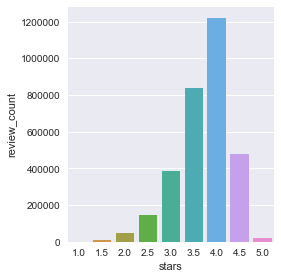

In [66]:
sns.factorplot(x='stars',y='review_count', data=df_star_reviewcount, kind='bar')

** 1. 
From the plot you can see that number of review counts is highest for restaurants with 4 stars, and the distribution among ratings is skewed right.**

**2. The numbers drop dramatically from 4 stars to 4.5, and from 4.5 to 5. So that means it's relatively easy to satisfy a customer (3.5-4 stars), but difficult to really impress them!**

** 3. The review and ratings distribution graphs suggest that perhaps people tend to review restaurants that they were more satisfied with.  However, more investigation is needed to determine whether its the number of reviews/popularity of a place that is causing higher ratings, or the other way around.**


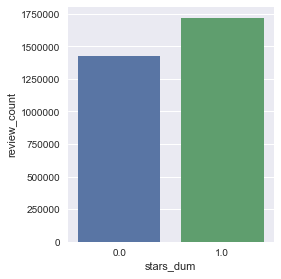

In [67]:
# vizualization of review count for high and low ratings
df_star_reviewcount= dfR.groupby(['stars_dum'], as_index=False).agg({'review_count':'sum'})
sns.factorplot(x='stars_dum',y='review_count', data=df_star_reviewcount, kind='bar')

**Results: We can see that the the number of reviews for restaurants with high rating is more than that of restraunts with low rating. This may be due to the fact that people are more inclined to give reviews when they are more satisfied with their dining experience.**

### Validate finding #2 with Machine Learning

In [68]:
#create dataframe specifically for the decision tree because we can only use columns with numeric values/dummies:
df1 = dfR[["review_count", "Parking", "is_open","BusinessAcceptsCreditCards","Alcohol","DogsAllowed","BikeParking",\
           "stars_dum","checkins","likes","neg_tip_comment","pos_tip_comment"]]
df1.head()

,review_count,Parking,is_open,BusinessAcceptsCreditCards,Alcohol,DogsAllowed,BikeParking,stars_dum,checkins,likes,neg_tip_comment,pos_tip_comment
3,116,1,1,0,1,0,1,0.0,263,0,0,25
4,5,0,1,0,1,0,0,1.0,1,0,0,0
9,7,1,1,0,1,0,1,0.0,28,0,1,1
10,12,1,0,0,1,0,0,0.0,3,0,2,0
13,34,1,1,0,1,0,1,0.0,94,0,6,15


In [69]:
##Make X & Y

X=df1.drop('stars_dum',axis=1)
Y =df1['stars_dum']

In [70]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [71]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

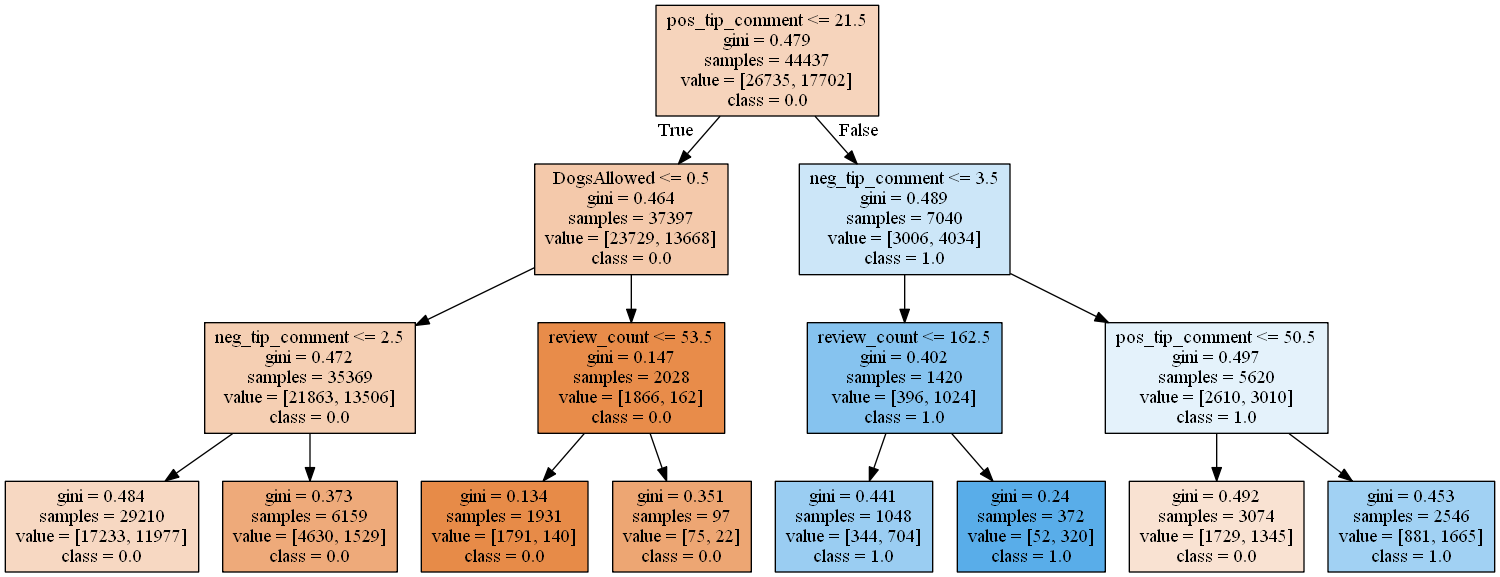

In [72]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names, filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

**Interpreting the tree:**

1. Number of positive tip mentions is the most defining factor… if number of positive count is less than 21.5 and number of negative tip count is less than 3.5, then there is a high chance of high rating for the restaurant. If the number of negative tip count is higher but number of positive tip comment is higher than number of negative count than there is high chance of high rating.


2. Surprisingly, for restaurants with a low number of reviews, Dogs Allowed is an important defining factor for whether they have a high or lower rating.

### Statistically Validate


In [73]:
df1['discretized_review_count']=pd.cut(df1.review_count,bins=[0,2000,4000,6000,8000],include_lowest=True)

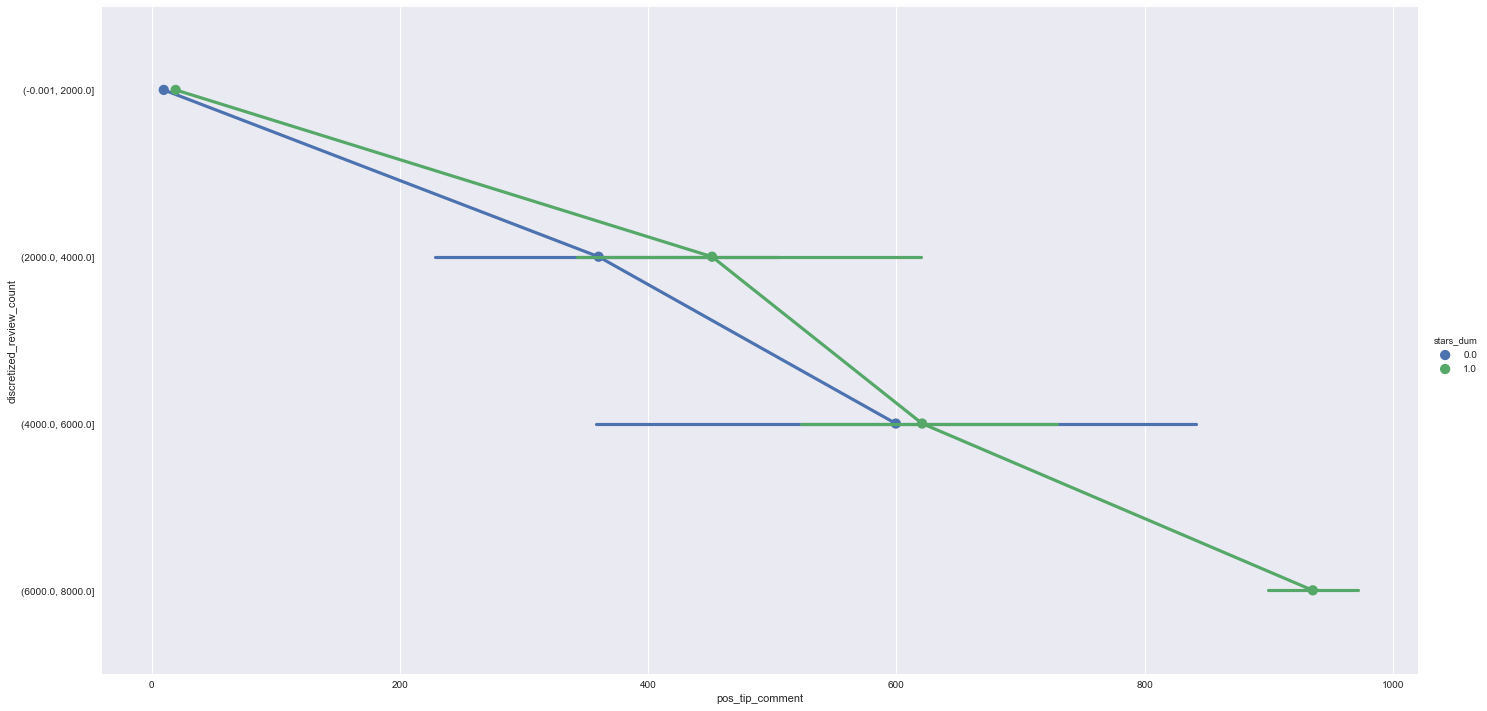

In [74]:
sns.factorplot(x='pos_tip_comment',y='discretized_review_count', data=df1,hue='stars_dum', kind='point',size=10,aspect=2)

**So its very important that managers give special attention to the comments that customers give. In case they are negative, they should talk to customers immediately to know their reasons of dissatisfaction and improve their restaurant and rating.**

### Prediction of Restaurant Rating Using Holdout & Test Sample

In [75]:
#import modules

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [76]:
#Step 1: split the data into training and test
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.3,random_state = 2)

In [77]:
#Step 2:train the classifier on the training set
cl = RandomForestClassifier(random_state = 2)
cl.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [78]:
##Predict on the test test
cl.predict(X_test)

array([0., 0., 0., ..., 0., 0., 1.])

In [79]:
(cl.predict(X_test)==Y_test).mean()

0.6145364536453646

In [80]:
#Step 3: predict on the test set
Y_pred= cl.predict(X_test)
Y_proba= cl.predict_proba(X_test)[:,1]
Y_pred[:10]
Y_proba[:10]

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0.])

array([0.1      , 0.1      , 0.2      , 0.9      , 0.5      , 0.7      ,
       0.2      , 0.4      , 0.4962181, 0.       ])

**Evaluate the classification performance:**

In [81]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_pred, Y_test)

array([[6008, 3148],
       [1991, 2185]], dtype=int64)

In [82]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.6145364536453646

In [83]:
#Precision(Out of the retrieved elements, how many are actually positive?)
from sklearn.metrics import precision_score
precision_score(Y_test,Y_pred)

0.523227969348659

In [84]:
#Recall(Among the relevant elements, how many did I retrieve?)
from sklearn.metrics import recall_score
recall_score(Y_test, Y_pred)

0.40971310706919184

In [85]:
##Auc_score 
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_proba)

0.6198803750712605

**Decision Tree Interpretation:**

For unbalanced data such as in this case, we need to look at the AUC score rather than the accuracy to evaluate the machine learning predictions.  Here, the AUC is only 0.62, which is not ideal since a score of 0.5 means the model is only as good as completely random predictions.  This suggests that maybe there are many other important factors that impact whether a restaurant has a high or low rating, and we don't have these variables available in our dataset.

#########################################################################################################################

## Finding 3: Comparing  the largest 3 fast food restaurant chains i.e. Subway, McDonald's, Starbucks(as per wikipedia)  in US vs. outside the US and provide business insight 

Subways that are in the US  have higher star ratings than those outside of the US.Both the McDonald’s and Starbucks that are in the US  have lower star ratings than those outside of the US.However,  Fewer McDonald’s  in the US have parking compared to those outside the US.

# 3.1 Creating US_states dummy column(wheather it's US or not')¶

In [86]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [87]:
# Only US states
US_states=set(states).intersection(mdf.state)

In [88]:
# Creating US_states dummy column
mdf['US_states'] = mdf.state.isin(US_states).astype(int)

# 3.2Cleaning the data for mdf_Subway_only, mdf_macdonalds_only, mdf_Starbucks_onlydata slice (For the purpose of basic analysis):¶

In [89]:
mdf_Subway_only = mdf[mdf['name'] == '"Subway"']
mdf_Subway_only = mdf.loc[mdf['name'] == '"Subway"']

In [90]:
mdf_mcdonalds_only = mdf[mdf['name'] == '"McDonald\'s"']
mdf_mcdonalds_only = mdf.loc[mdf['name'] == '"McDonald\'s"']

In [91]:
mdf_Starbucks_only = mdf[mdf['name'] == '"Starbucks"']
mdf_Starbucks_only = mdf.loc[mdf['name'] == '"Starbucks"']

# 3.3 Number of restruants in and outside of US forSubway, McDonald's, Starbucks

In [92]:
#There are 651 Subway in the data set
#From which 563(i.e. 86%) are in the US and 88(i.e.14%) outside of the US

In [93]:
len(mdf_Subway_only)
len(mdf_Subway_only[mdf_Subway_only['US_states']==1])

651

563

In [94]:
#There are 671 McDonald's in the data set
#From which 483(i.e. 72% ) are in the US and 188(i.e. 28%) are outside of the US

In [95]:
len(mdf_mcdonalds_only)
len(mdf_mcdonalds_only[mdf_mcdonalds_only['US_states']==1])

671

483

In [96]:
#There are 932 Starbucks in the data set
#From which 619(i.e. 66%) are in the US and 313(i.e. 34%) outside of the US

In [97]:
len(mdf_Starbucks_only)
len(mdf_Starbucks_only[mdf_Starbucks_only['US_states']==1])

932

619

# 3.4Plots comapring ratings for Subway, McDonald's, Starbucks(as per wikipedia) in US vs. outside the US¶

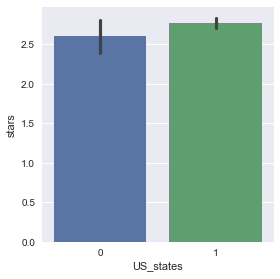

In [98]:
sns.factorplot(x='US_states',y='stars', kind='bar', data=mdf_Subway_only,
              aspect =1)

#Those Subway's that are in the US are rated higher than those outside of the US

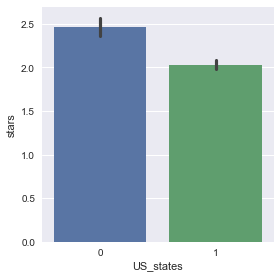

In [99]:
sns.factorplot(x='US_states',y='stars', kind='bar', data=mdf_mcdonalds_only,
              aspect =1)

#Those McDonald's that are in the US are rated lower than those outside of the US

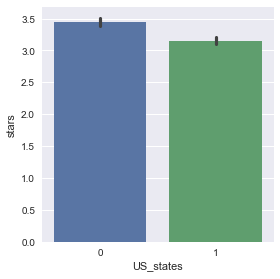

In [100]:
sns.factorplot(x='US_states',y='stars', kind='bar', data=mdf_Starbucks_only,
              aspect =1)

 Those Starbucks that are in the US are rated lower than those outside of the US

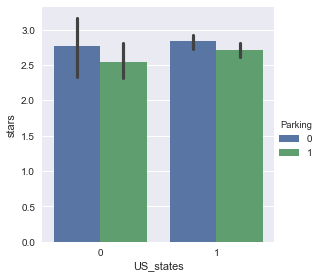

In [101]:
sns.factorplot(x='US_states',y='stars',hue='Parking', kind='bar', data=mdf_Subway_only,
              aspect =1)

#For Subway, suprisingly its rated higher if they don't have parking for both us and non us states

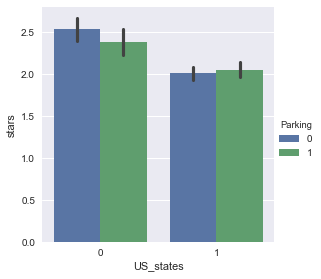

In [102]:
sns.factorplot(x='US_states',y='stars',hue='Parking', kind='bar', data=mdf_mcdonalds_only,
              aspect =1)

# McDonald's
If McDonald's is not in the US and has parking it's rated higher rated . In the contrary, those McDonald's that are in the US are lower higher than those outside of the US. And supprisingly for those that are in the US, if they have parking they are higher rated than those that does not have parking.

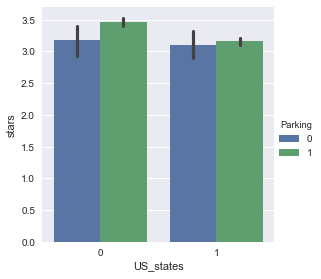

In [103]:
sns.factorplot(x='US_states',y='stars',hue='Parking', kind='bar', data=mdf_Starbucks_only,
              aspect =1)

#  Starbucks 
 For  Starbucks,  its rated higher  if they have parking for both us and non us states

# 3.5 Validating finding with machine learning

In [104]:
#3.5.1Creating dummy column denoting whether the restaurant is Subway,McDonald's, Starbucks or not
mdf['Subway']=mdf['name'].str.contains('Subway').astype(int)
mdf['McDon']=mdf['name'].str.contains('McDonald').astype(int)
mdf['Starbucks']=mdf['name'].str.contains('Starbucks').astype(int)

In [105]:
#3.5.2 Creating a new df with 'Subway','McDon','Starbucks' dummies
col_list = ['stars', 'review_count', 'stars_dum', 'US_states',
    'is_open','BusinessAcceptsCreditCards', 'BikeParking', 'Alcohol','DogsAllowed', 'Open24Hours', 'Parking', 'Subway','McDon','Starbucks']

df = mdf[col_list]

# 3.5.3 K-Means Clustering Analysis for Subway

In [106]:
from sklearn.cluster import KMeans

In [107]:
df_Subway= df[df['Subway']==1]

In [108]:
clust = KMeans(n_clusters=3, random_state=0)
clust

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [109]:
clust.fit(df_Subway)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [110]:
df2 = df_Subway.copy()

In [111]:
df2['cluster']=clust.labels_

In [112]:
df2.groupby('cluster').mean()

,stars,review_count,stars_dum,US_states,is_open,BusinessAcceptsCreditCards,BikeParking,Alcohol,DogsAllowed,Open24Hours,Parking,Subway,McDon,Starbucks
cluster,,,,,,,,,,,,,,
0,2.767196,10.708995,0.121693,0.968254,0.978836,0.0,0.989418,1.0,0.068783,0.0,0.460317,1.0,0.0,0.0
1,2.720379,4.428910,0.120853,0.805687,0.940758,0.0,0.992891,1.0,0.026066,0.0,0.651659,1.0,0.0,0.0
2,2.875000,20.800000,0.125000,1.000000,0.950000,0.0,1.000000,1.0,0.050000,0.0,0.375000,1.0,0.0,0.0


We see that Subway in the US is rated higher than those outside of the US (which valideates our finding in the plots). So, for the cluster 2 where Subway is in the US we see that it has the highset star rating. Also, we can see that those that have the highest star ratings(cluster 2) are most reviewed . Additionally, it is very interesting that those that have parking still rated the lowest (cluster 3), it means whether Subway's has parking or not doesn't affect too much on it being rated high.¶

In [113]:
df2['binned_review'] = pd.cut(df2.review_count,bins=[30,60,100,200,300,500,1000])

In [114]:
df2.groupby('binned_review').size()

binned_review
(30, 60]       2
(60, 100]      0
(100, 200]     0
(200, 300]     0
(300, 500]     0
(500, 1000]    0
dtype: int64

We see from these numbers that McDonald's is getting mostly from 30 to 60 reviews. Which is not a lot.

In [115]:
df2['binned_review1'] = pd.cut(df2.review_count,bins=[1000,2000,3000,4000,5000,6000,7000])

In [116]:
df2.groupby('binned_review1').size()

binned_review1
(1000, 2000]    0
(2000, 3000]    0
(3000, 4000]    0
(4000, 5000]    0
(5000, 6000]    0
(6000, 7000]    0
dtype: int64

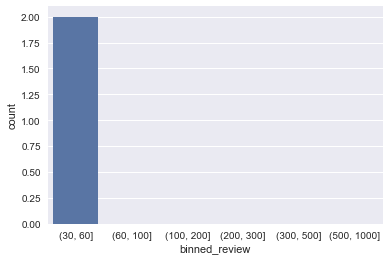

In [117]:
## Review counts for Subway
sns.countplot(x='binned_review', data=df2)

# 3.5.4 K-Means Clustering Analysis for Mcdonalds¶

In [118]:
from sklearn.cluster import KMeans

In [119]:
df_mc= df[df['McDon']==1]

In [120]:
clust1 = KMeans(n_clusters=3, random_state=0)
clust1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [121]:
clust1.fit(df_mc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [122]:
df3 = df_mc.copy()

In [123]:
df3['cluster']=clust1.labels_

In [124]:
df3.groupby('cluster').mean()

,stars,review_count,stars_dum,US_states,is_open,BusinessAcceptsCreditCards,BikeParking,Alcohol,DogsAllowed,Open24Hours,Parking,Subway,McDon,Starbucks
cluster,,,,,,,,,,,,,,
0,2.229979,6.954825,0.034908,0.622177,0.956879,0.002053,1.000000,1.0,0.583162,0.0,0.537988,0.0,1.0,0.0
1,2.071078,22.112745,0.009804,0.887255,0.970588,0.000000,0.995098,1.0,0.848039,0.0,0.392157,0.0,1.0,0.0
2,1.920455,52.454545,0.000000,1.000000,0.977273,0.000000,1.000000,1.0,0.931818,0.0,0.568182,0.0,1.0,0.0


#We see that the McDonald's in the US is rated lower on average than for those outside of the US (which valideates our finding). So, for the cluster 2 where McDonald's is in the US we see that it has the lowest star rating. Also, we can see that those that have the highest star ratings(cluster 0) are reviewed the least. This is different from that of subway. Additionally, it is very interesting that those that have parking still rated the lowest (cluster 3), it means whether McDonald's has parking or not doesn't affect too much on it being rated high.

In [125]:
df3['binned_review'] = pd.cut(df3.review_count,bins=[30,60,100,200,300,500,1000])

In [126]:
df3.groupby('binned_review').size()

binned_review
(30, 60]       61
(60, 100]       9
(100, 200]      0
(200, 300]      0
(300, 500]      0
(500, 1000]     0
dtype: int64

We see from these numbers that McDonald's is getting mostly from 30 to 60 reviews. Which is not a lot.

In [127]:
df3['binned_review1'] = pd.cut(df3.review_count,bins=[1000,2000,3000,4000,5000,6000,7000])

In [128]:
df3.groupby('binned_review1').size()

binned_review1
(1000, 2000]    0
(2000, 3000]    0
(3000, 4000]    0
(4000, 5000]    0
(5000, 6000]    0
(6000, 7000]    0
dtype: int64

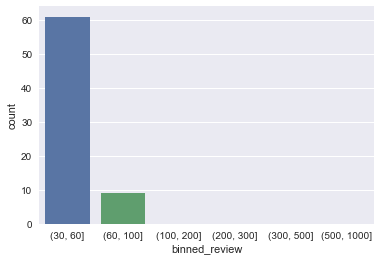

In [129]:
## Review counts for McDonald's
sns.countplot(x='binned_review', data=df3)

# 3.5.5. K-Means Clustering Analysis for Starbucks

In [130]:
from sklearn.cluster import KMeans

In [131]:
df_Starbucks= df[df['Starbucks']==1]

In [132]:
clust2 = KMeans(n_clusters=3, random_state=0)
clust2

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [133]:
clust2.fit(df_Starbucks)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [134]:
df4 = df_Starbucks.copy()

In [135]:
df4['cluster']=clust2.labels_

In [136]:
df4.groupby('cluster').mean()

,stars,review_count,stars_dum,US_states,is_open,BusinessAcceptsCreditCards,BikeParking,Alcohol,DogsAllowed,Open24Hours,Parking,Subway,McDon,Starbucks
cluster,,,,,,,,,,,,,,
0,3.138767,36.017621,0.114537,0.916300,0.964758,0.004405,0.986784,1.000000,0.0,0.0,0.933921,0.0,0.0,1.0
1,3.319785,9.345092,0.292945,0.544479,0.915644,0.000000,0.995399,0.984663,0.0,0.0,0.973926,0.0,0.0,1.0
2,2.963235,79.602941,0.029412,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.0,0.970588,0.0,0.0,1.0


 The finding based on the above is that the Starbucks in the US is rated lower than those outside of the US (which valideates our finding). So, for the cluster 2 where Starbucks is in the US we see that it has the lowest star rating. Also, we can see that those that have the highest star ratings(cluster 1) are reviewed the least. We can see that the results for Starbucks stayed almost the same as for McDonald's and differes from Subway.

In [137]:
df4['binned_review'] = pd.cut(df4.review_count,bins=[30,60,100,200,300,500,1000])

In [138]:
df4.groupby('binned_review').size()

binned_review
(30, 60]       150
(60, 100]       48
(100, 200]      11
(200, 300]       0
(300, 500]       0
(500, 1000]      0
dtype: int64

In [139]:
df4['binned_review1'] = pd.cut(df4.review_count,bins=[1000,2000,3000,4000,5000,6000,7000])

In [140]:
df4.groupby('binned_review1').size()

binned_review1
(1000, 2000]    0
(2000, 3000]    0
(3000, 4000]    0
(4000, 5000]    0
(5000, 6000]    0
(6000, 7000]    0
dtype: int64

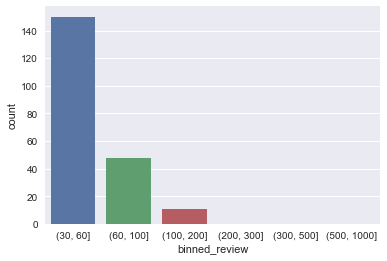

In [141]:
## Review counts for Starbucks
sns.countplot(x='binned_review', data=df4)

We see that the reviews are mostly 30-60, 60-100, and 100-200 is more or what significant too

## Managerial Findings & Recommendations:

1. People tend to review restaurants more than other types of businesses on Yelp.  Thus,  restaurants, coffee shops, etc. leverage Yelp reviews as a way to boost their online presence and attract more customers.

2. The tips review that people leave for restaurants on Yelp are very important for ratings.  In case of negative sentiment in tip reviews, business owners can respond quickly to concerns of customers to  minimize low ratings.

3. Using World's largest 3 restruant chain i.e. Subway, McDonald's & Starbucks as an example , customer perceptions of a restaurant can be very different within the US versus outside the US.  Chain restaurants can do some market research so that they can tailor their food offerings and their marketing strategy to each particular country/region.